In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
! mkdir ~/.kaggle

In [ ]:
! cp "/content/drive/MyDrive/Research Project/IT18220520/Test Data/kaggle.json" ~/.kaggle/

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download jonathanoheix/face-expression-recognition-dataset

 80% 97.0M/121M [00:00<00:00, 136MB/s]
100% 121M/121M [00:00<00:00, 154MB/s] 


In [ ]:
!unzip "/content/face-expression-recognition-dataset.zip"

Streaming output truncated to the last 5000 lines.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/fear/9602.jpg  
  inflating:

In [ ]:
picture_size = 48
folder_path = "/content/images/images/"

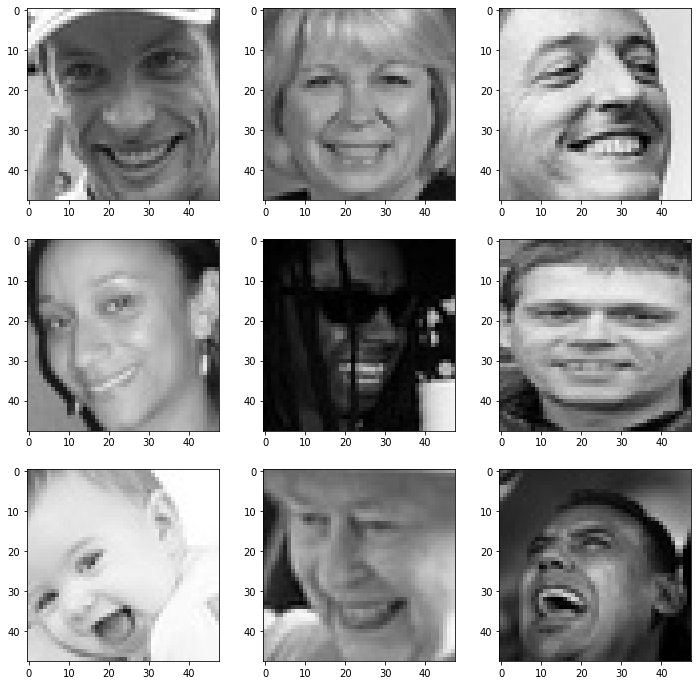

In [ ]:
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import load_img, img_to_array

expression = 'happy'

plt.figure(figsize= (12,12))
for i in range(1, 10, 1):
    plt.subplot(3,3,i)
    img = load_img(folder_path+"train/"+expression+"/"+ os.listdir(folder_path + "train/" + expression)[i], target_size=(picture_size, picture_size))
    plt.imshow(img)
plt.show()

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

batch_size  = 128

datagen_train  = ImageDataGenerator()
datagen_val = ImageDataGenerator()

train_set = datagen_train.flow_from_directory(folder_path+"train",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=True)


test_set = datagen_val.flow_from_directory(folder_path+"validation",
                                              target_size = (picture_size,picture_size),
                                              color_mode = "grayscale",
                                              batch_size=batch_size,
                                              class_mode='categorical',
                                              shuffle=False)

Found 28821 images belonging to 7 classes.
Found 7066 images belonging to 7 classes.


In [ ]:
val = []
emotions = []
for expression in os.listdir(folder_path + "train"):
  val.append(len(os.listdir(folder_path + "train/" + expression)))
  emotions.append(expression)
  print(str(len(os.listdir(folder_path + "train/" + expression))) + " " + expression + " images")

4938 sad images
4982 neutral images
436 disgust images
4103 fear images
7164 happy images
3993 angry images
3205 surprise images


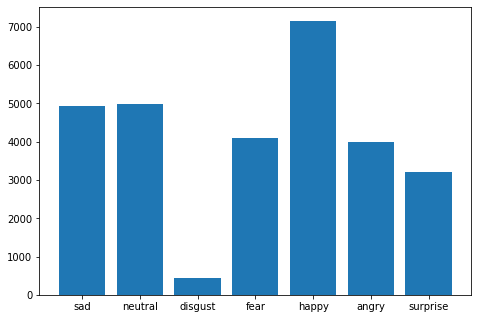

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(emotions,val)
plt.show()

In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

model.compile(
    optimizer=RMSprop(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy'],
  )


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/drive/MyDrive/Research Project/Test Data/model_RMSprop.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 60

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
model.save('/content/drive/MyDrive/Research Project/Test Data/model_RMSprop.hdf5')

Epoch 1/60
225/225 [==============================] - 31s 74ms/step - loss: 1.8902 - accuracy: 0.3011 - val_loss: 3.7706 - val_accuracy: 0.1720 - lr: 0.0100
Epoch 2/60
225/225 [==============================] - 15s 68ms/step - loss: 1.3865 - accuracy: 0.4683 - val_loss: 1.6728 - val_accuracy: 0.3558 - lr: 0.0100
Epoch 3/60
225/225 [==============================] - 13s 56ms/step - loss: 1.2467 - accuracy: 0.5239 - val_loss: 1.5943 - val_accuracy: 0.4011 - lr: 0.0100
Epoch 4/60
225/225 [==============================] - 13s 57ms/step - loss: 1.1679 - accuracy: 0.5598 - val_loss: 1.3353 - val_accuracy: 0.4977 - lr: 0.0100
Epoch 5/60
225/225 [==============================] - 13s 57ms/step - loss: 1.0991 - accuracy: 0.5864 - val_loss: 1.3189 - val_accuracy: 0.4977 - lr: 0.0100
Epoch 6/60
225/225 [==============================] - 15s 65ms/step - loss: 1.0355 - accuracy: 0.6108 - val_loss: 1.7975 - val_accuracy: 0.3741 - lr: 0.0100
Epoch 7/60
225/225 [==============================] - 13s 

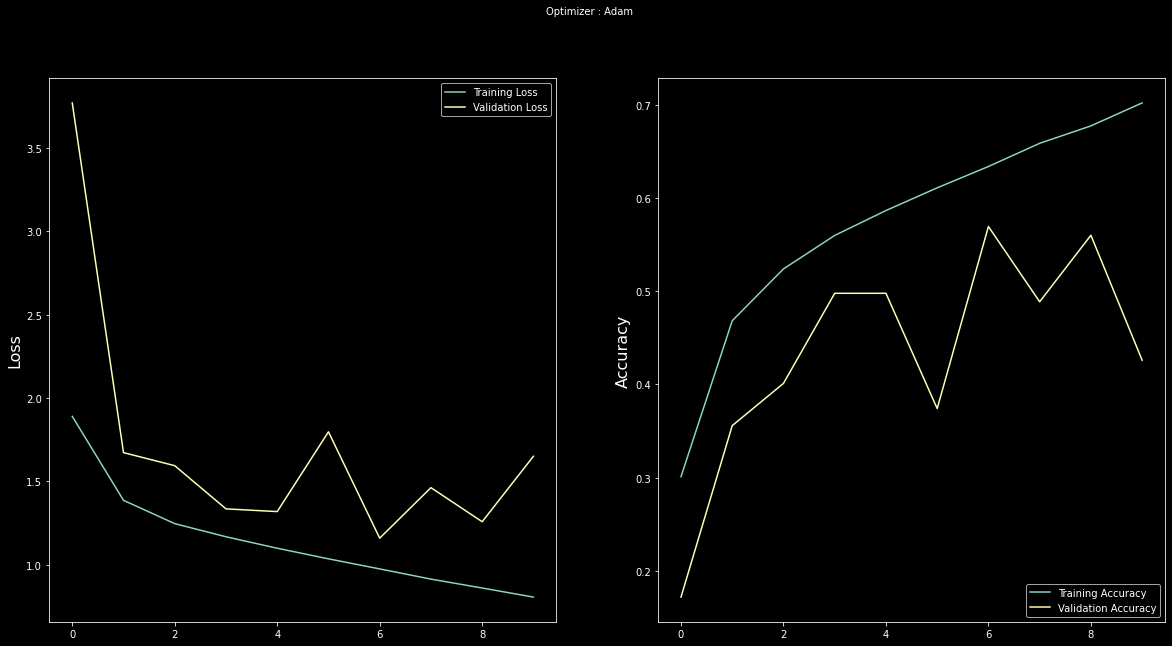

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(model.evaluate(test_set, verbose=0))
_, acc = model.evaluate(test_set, verbose=0)

[1.158341407775879, 0.5701953172683716]


In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))



opt = Adam(learning_rate = 0.0001)
model.compile(optimizer=opt,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 128)       2

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

checkpoint = ModelCheckpoint("/content/drive/MyDrive/Research Project/Test Data/model.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

epochs = 48

model.compile(loss='categorical_crossentropy',
              optimizer = Adam(learning_rate=0.001),
              metrics=['accuracy'])

In [ ]:
history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list
                                )
model.save('/content/drive/MyDrive/Research Project/Test Data/model1.hdf5')

Epoch 1/48
225/225 [==============================] - 33s 82ms/step - loss: 1.7703 - accuracy: 0.3217 - val_loss: 1.7245 - val_accuracy: 0.3293 - lr: 0.0010
Epoch 2/48
225/225 [==============================] - 13s 59ms/step - loss: 1.4219 - accuracy: 0.4537 - val_loss: 1.6710 - val_accuracy: 0.4322 - lr: 0.0010
Epoch 3/48
225/225 [==============================] - 13s 56ms/step - loss: 1.2746 - accuracy: 0.5126 - val_loss: 1.4512 - val_accuracy: 0.4619 - lr: 0.0010
Epoch 4/48
225/225 [==============================] - 13s 56ms/step - loss: 1.1925 - accuracy: 0.5463 - val_loss: 1.3724 - val_accuracy: 0.4676 - lr: 0.0010
Epoch 5/48
225/225 [==============================] - 13s 60ms/step - loss: 1.1320 - accuracy: 0.5674 - val_loss: 1.1604 - val_accuracy: 0.5592 - lr: 0.0010
Epoch 6/48
225/225 [==============================] - 13s 56ms/step - loss: 1.0824 - accuracy: 0.5891 - val_loss: 1.3553 - val_accuracy: 0.4879 - lr: 0.0010
Epoch 7/48
225/225 [==============================] - 13s 

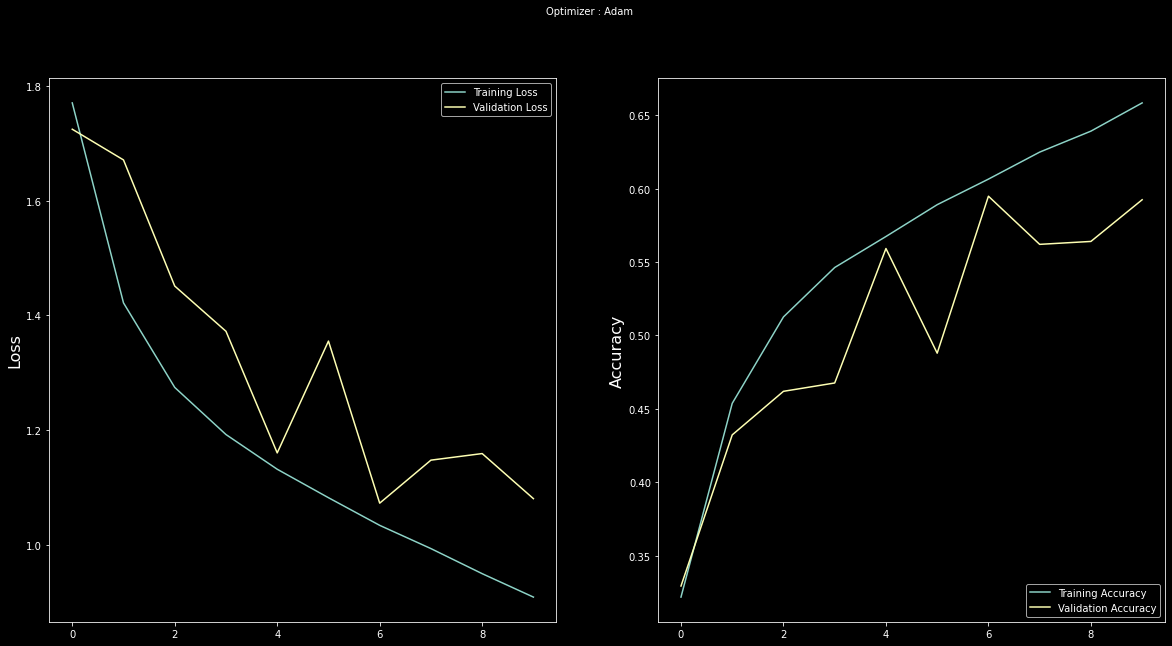

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(model.evaluate(test_set, verbose=0))
_, acc = model.evaluate(test_set, verbose=0)

[1.072703242301941, 0.5949617624282837]


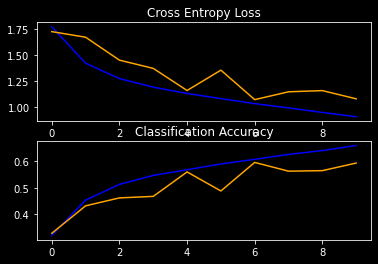

In [ ]:
import sys
plt.subplot(211)
plt.title('Cross Entropy Loss')
plt.plot(history.history['loss'], color='blue', label='train')
plt.plot(history.history['val_loss'], color='orange', label='test')
# plot accuracy
plt.subplot(212)
plt.title('Classification Accuracy')
plt.plot(history.history['accuracy'], color='blue', label='train')
plt.plot(history.history['val_accuracy'], color='orange', label='test')


In [ ]:
# save plot to file
filename = sys.argv[0].split('/')[-1]
plt.savefig(filename + '_plot.png')
plt.close()

In [ ]:
print('> %.3f' % (acc * 100.0))

> 59.496


In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential

no_of_classes = 7

model = Sequential()

#1st CNN layer
model.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

#2nd CNN layer
model.add(Conv2D(128,(5,5),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#3rd CNN layer
model.add(Conv2D(512,(3,3),padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout (0.25))

#4th CNN layer
model.add(Conv2D(512,(3,3), padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())

#Fully connected 1st layer
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))


# Fully connected layer 2nd layer
model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(no_of_classes, activation='softmax'))

epochs=100
learning_rate = 0.1
decay_rate = learning_rate / epochs
momentum = 0.8

sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

model.compile(optimizer=sgd,loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 48, 48, 64)        640       
                                                                 
 batch_normalization_6 (Batc  (None, 48, 48, 64)       256       
 hNormalization)                                                 
                                                                 
 activation_6 (Activation)   (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_5 (Conv2D)           (None, 24, 24, 128)      

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Research Project/Test Data/model_SGD.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=10,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)

callbacks_list = [early_stopping,checkpoint,reduce_learningrate]

history = model.fit(train_set,
                                steps_per_epoch=train_set.n//train_set.batch_size,
                                epochs=epochs,
                                validation_data = test_set,
                                validation_steps = test_set.n//test_set.batch_size,
                                callbacks=callbacks_list,
                                )

Epoch 1/100
225/225 [==============================] - 14s 58ms/step - loss: 1.9469 - accuracy: 0.2637 - val_loss: 1.7299 - val_accuracy: 0.3308 - lr: 0.1000
Epoch 2/100
225/225 [==============================] - 13s 57ms/step - loss: 1.6150 - accuracy: 0.3732 - val_loss: 1.6466 - val_accuracy: 0.3449 - lr: 0.1000
Epoch 3/100
225/225 [==============================] - 13s 57ms/step - loss: 1.4559 - accuracy: 0.4360 - val_loss: 1.4841 - val_accuracy: 0.4155 - lr: 0.1000
Epoch 4/100
225/225 [==============================] - 13s 56ms/step - loss: 1.3582 - accuracy: 0.4743 - val_loss: 1.3345 - val_accuracy: 0.4834 - lr: 0.1000
Epoch 5/100
225/225 [==============================] - 13s 56ms/step - loss: 1.2880 - accuracy: 0.5067 - val_loss: 1.2999 - val_accuracy: 0.5011 - lr: 0.1000
Epoch 6/100
225/225 [==============================] - 13s 56ms/step - loss: 1.2331 - accuracy: 0.5275 - val_loss: 1.2401 - val_accuracy: 0.5291 - lr: 0.1000
Epoch 7/100
225/225 [==============================]

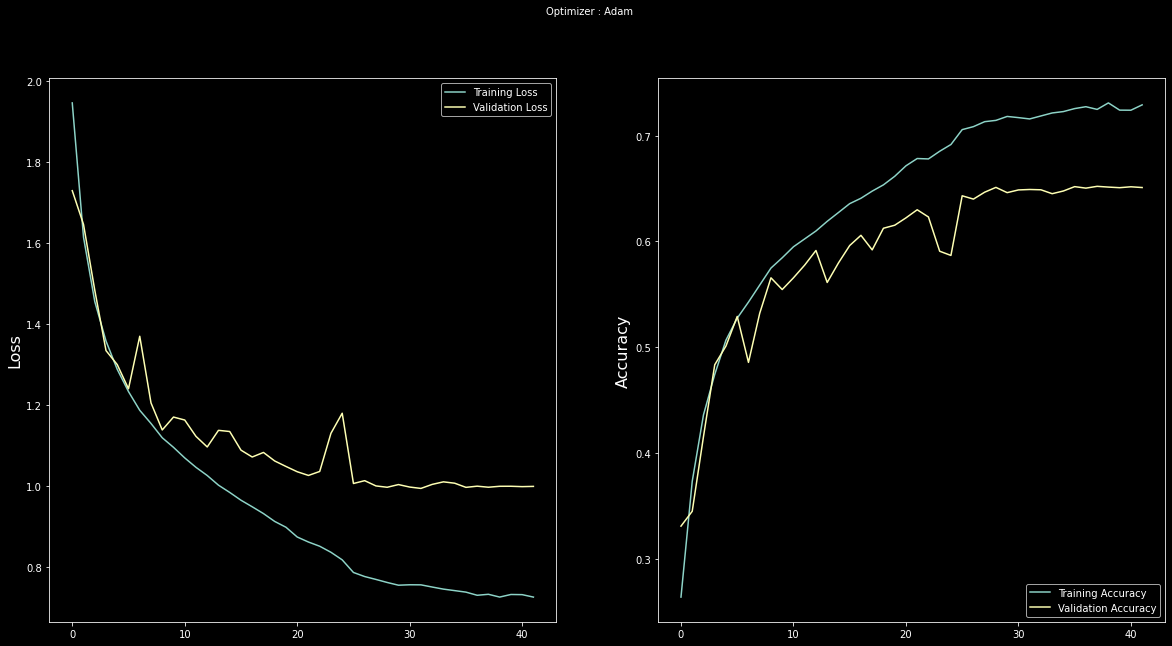

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(model.evaluate(test_set, verbose=0))
_, acc = model.evaluate(test_set, verbose=0)

[0.9927936792373657, 0.6498726010322571]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  """


<Figure size 432x288 with 0 Axes>

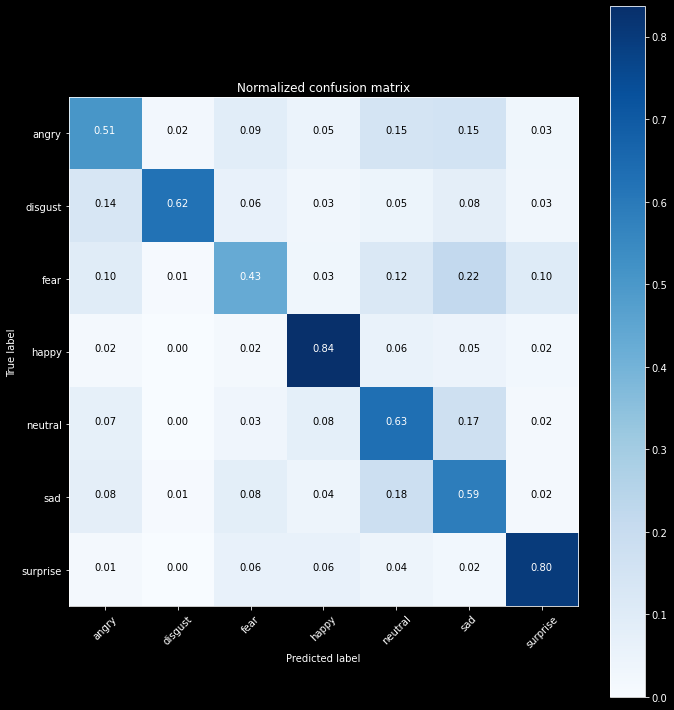

In [ ]:
import numpy as np
# show the confusion matrix of our predictions

# compute predictions
predictions = model.predict_generator(generator=test_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_set.classes
class_names = test_set.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()

In [ ]:
# solution
epochs = 60
learning_rate = 0.5 # initial learning rate
decay_rate = 0.1
momentum = 0.8

In [ ]:
sgd = SGD(learning_rate=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)

num_classes = 7
batch_size = 128

In [ ]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from keras.layers import Dense,Input,Dropout,GlobalAveragePooling2D,Flatten,Conv2D,BatchNormalization,Activation,MaxPooling2D
from keras.models import Model,Sequential

no_of_classes = 7

model3 = Sequential()

#1st CNN layer
model3.add(Conv2D(64,(3,3),padding = 'same',input_shape = (48,48,1)))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout(0.25))

#2nd CNN layer
model3.add(Conv2D(128,(5,5),padding = 'same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout (0.25))

#3rd CNN layer
model3.add(Conv2D(512,(3,3),padding = 'same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size = (2,2)))
model3.add(Dropout (0.25))

#4th CNN layer
model3.add(Conv2D(512,(3,3), padding='same'))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Dropout(0.25))

model3.add(Flatten())

#Fully connected 1st layer
model3.add(Dense(256))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.25))


# Fully connected layer 2nd layer
model3.add(Dense(512))
model3.add(BatchNormalization())
model3.add(Activation('relu'))
model3.add(Dropout(0.25))

model3.add(Dense(no_of_classes, activation='softmax'))

In [ ]:
model3.compile(loss='categorical_crossentropy', 
                                optimizer=sgd, 
                                metrics=['acc'])

In [ ]:
def exp_decay(epoch):
    lrate = learning_rate * np.exp(-decay_rate*epoch)
    return lrate

In [ ]:
from keras.callbacks import LearningRateScheduler
checkpoint = ModelCheckpoint("/content/drive/MyDrive/Research Project/Test Data/model_SGD_Optimize.hdf5", monitor='val_acc', verbose=1, save_best_only=True, mode='max')

early_stopping = EarlyStopping(monitor='val_loss',
                          min_delta=0,
                          patience=3,
                          verbose=1,
                          restore_best_weights=True
                          )

reduce_learningrate = ReduceLROnPlateau(monitor='val_loss',
                              factor=0.2,
                              patience=3,
                              verbose=1,
                              min_delta=0.0001)


callbacks = [
    LearningRateScheduler(exp_decay, verbose=1),
    early_stopping,
    checkpoint,
    reduce_learningrate
]

In [ ]:
import numpy as np
# you invoke the LearningRateScheduler during the .fit() phase
exponential_decay_model_history = model3.fit(train_set,
                                    batch_size=batch_size,
                                    epochs=epochs,
                                    callbacks=callbacks,
                                    verbose=1,
                                    validation_data=test_set)


Epoch 1: LearningRateScheduler setting learning rate to 0.5.
Epoch 1/60
226/226 [==============================] - ETA: 0s - loss: 2.1331 - acc: 0.2340
Epoch 1: val_acc improved from -inf to 0.26394, saving model to /content/drive/MyDrive/Research Project/Test Data/model_SGD_Optimize.hdf5
226/226 [==============================] - 14s 58ms/step - loss: 2.1331 - acc: 0.2340 - val_loss: 1.8975 - val_acc: 0.2639 - lr: 0.5000

Epoch 2: LearningRateScheduler setting learning rate to 0.45241870901797976.
Epoch 2/60
226/226 [==============================] - ETA: 0s - loss: 1.8213 - acc: 0.2511
Epoch 2: val_acc improved from 0.26394 to 0.26974, saving model to /content/drive/MyDrive/Research Project/Test Data/model_SGD_Optimize.hdf5
226/226 [==============================] - 14s 60ms/step - loss: 1.8213 - acc: 0.2511 - val_loss: 1.7748 - val_acc: 0.2697 - lr: 0.4524

Epoch 3: LearningRateScheduler setting learning rate to 0.4093653765389909.
Epoch 3/60
226/226 [==============================

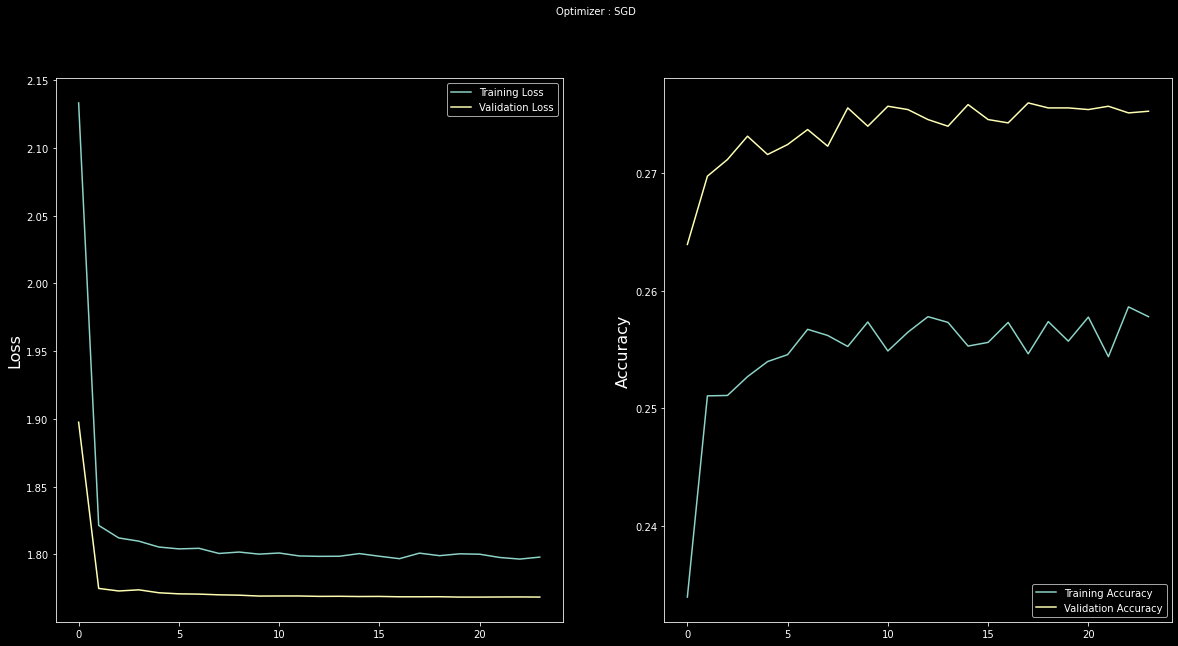

In [ ]:
plt.style.use('dark_background')

plt.figure(figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle('Optimizer : SGD', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(exponential_decay_model_history.history['loss'], label='Training Loss')
plt.plot(exponential_decay_model_history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')

plt.subplot(1, 2, 2)
plt.ylabel('Accuracy', fontsize=16)
plt.plot(exponential_decay_model_history.history['acc'], label='Training Accuracy')
plt.plot(exponential_decay_model_history.history['val_acc'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.show()

In [ ]:
print(model3.evaluate(test_set, verbose=0))
_, acc = model3.evaluate(test_set, verbose=0)

[1.768385410308838, 0.27540335059165955]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  after removing the cwd from sys.path.


<Figure size 432x288 with 0 Axes>

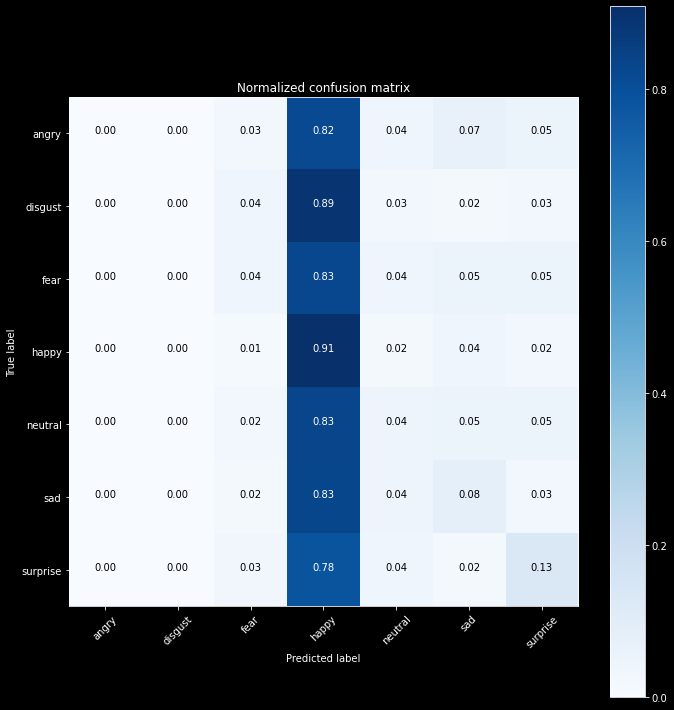

In [ ]:
# show the confusion matrix of our predictions

# compute predictions
predictions = model3.predict_generator(generator=test_set)
y_pred = [np.argmax(probas) for probas in predictions]
y_test = test_set.classes
class_names = test_set.class_indices.keys()

from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix', cmap=plt.cm.Blues):
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Normalized confusion matrix')
plt.show()